In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

### Tuning KNN

#### While KNN is a relatively simple model, there are several things we can do to tune its performance. These primarily have to do with how we handle distance and how many neighbors we include.

#### Distance and Normalizing
* Normalization is a way of taking these seemingly incommensurate measures and making them comparable.

##### 2 different ways to normalize in KNN
* You can set the bounds of the data to 0 and 1, and then rescale every variable to be within those bounds (it may also be reasonable to do -1 to 1, but the difference is actually immaterial). This way every data point is measured in terms of its distance between the max and minimum of its category. This is best if the data shows a linear relationship, such that scaling to a 0 to 1 range makes logical sense. It is also best if there are known limits to the dataset, as those make for logical bounds for 0 and 1 for the rescaling.
* You can also calculate how far each observation is from the mean, expressed in number of standard deviations: this is often called z-scores. Calculating z-scores and using them as your basis for measuring distance works for continuous data and puts everything in terms of how far from the mean (or "abnormal") it is.

#### Weighting
* There is one more thing to address when talking about distance, and that is weighting. In the vanilla version of KNN, all 𝑘 of the closest observations are given equal votes on what the outcome of our test observation should be. When the data is densely populated that isn't necessarily a problem. Particularly if there is variance in the measurement itself, not trying to draw information from small differences in distance can be wise.
* However, sometimes the 𝑘 nearest observations are not all similarly close to the test. In that case it may be useful to weight by distance. Functionally this will weight by the inverse of distance, so that closer datapoints (with a low distance) have a higher weight than further ones.


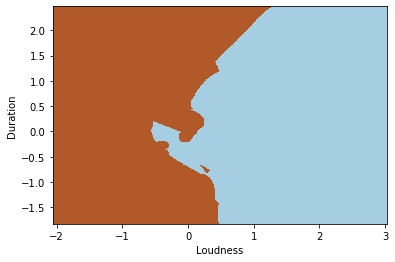

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'loudness': stats.zscore(music.loudness),
    'duration': stats.zscore(music.duration)
})

# Fit our model.
Y = music.jazz
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .01

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### This is a much more nuanced decision boundary, but it's also relatively continuous and consistent, providing a nice sense of which regions are likely to be which classification.

### Choosing K

#### The last major aspect of tuning KNN is picking 𝑘.  This choice is largely up to the data scientist building the model but there are some things to consider.

#### Choosing 𝑘 is a tradeoff. The larger the 𝑘 the more smoothed out your decision space will be, with more observations getting a vote in the prediction. A smaller 𝑘 will pick up more subtle deviations, but these deviations could be just randomness and therefore you could just be overfitting. Add in weighting and that's an additional dimension to this entire conversation.


#### In the end, the best technique is probably to try multiple models and use your validation techniques to see which is best. In particular, k-fold cross validation is a great way to see how your KNN model is performing.

### DRILL:

#### Let's say we work at a credit card company and we're trying to figure out if people are going to pay their bills on time. We have everyone's purchases, split into four main categories: groceries, dining out, utilities, and entertainment. What are some ways you might use KNN to create this model? What aspects of KNN would be useful? Write up your thoughts in submit a link below:

* Could convert whether or not people pay on time into binary units.  A '0' would be 'yes' and '1' would be 'no'
* Can create a control group that contains people who have paid on time and spending history for a period in the past and a more current data set to see if changes in spending history (price increase, sales, etc.) contribute to ontime payments
* Can establish a mean and then establish z scores for ontime/late payments